In [4]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.11.0


In [5]:
# Load dataset

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data(path="mnist/mnist.npz")

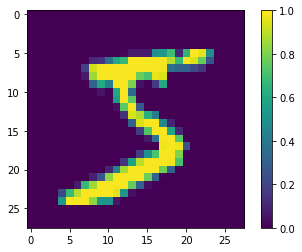

In [37]:
# Plot first image

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [34]:
# Preprocessing

train_images = train_images / 255.0
test_images = test_images / 255.0

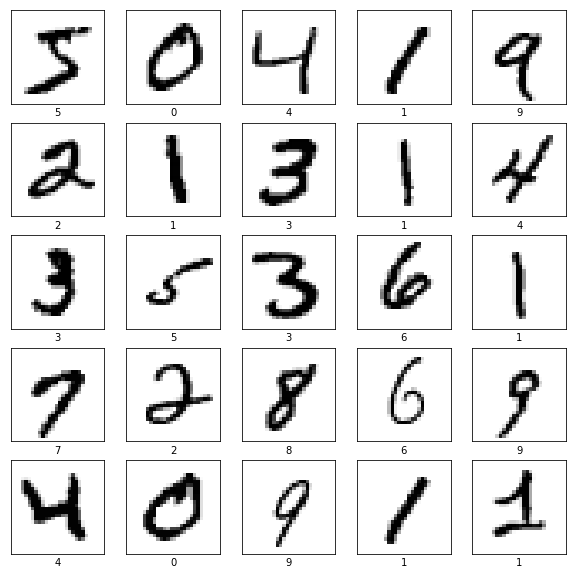

In [38]:
# Plot the 25 first images

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

In [7]:
# Set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [8]:
# Set the model

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
type(train_images)

numpy.ndarray

In [75]:
# Train the model

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.2623 - acc: 0.9254
Epoch 2/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.1160 - acc: 0.9662
Epoch 3/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.0798 - acc: 0.9761
Epoch 4/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.0590 - acc: 0.9826
Epoch 5/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.0470 - acc: 0.9856


In [76]:
# Evaluate accuracy

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 24us/step
Test accuracy: 0.9749


In [62]:
# Make prediction

predictions = model.predict(test_images)
np.argmax(predictions[0])

7

In [63]:
test_labels[0]

7

In [64]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

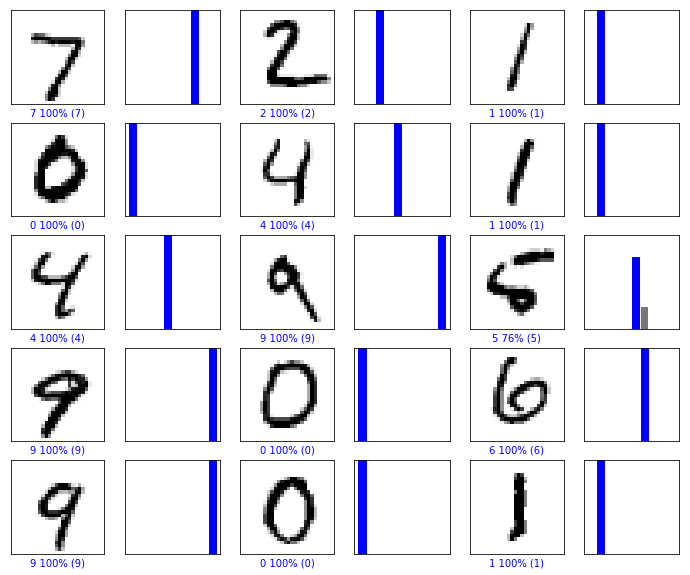

In [65]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

(28, 28)
(1, 28, 28)
[[1.8503528e-09 1.7583281e-07 7.0760780e-06 7.5539807e-05 7.1072585e-11
  1.1282764e-07 3.3067424e-13 9.9989855e-01 1.8122516e-07 1.8450210e-05]]


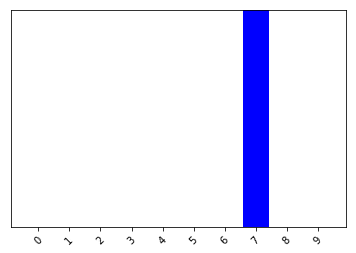

In [83]:
# Check erros for 7

img = test_images[0]
print(img.shape)

img = (np.expand_dims(img,0))
print(img.shape)

predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), [0,1,2,3,4,5,6,7,8,9], rotation=45)